In [2]:
!pip install audiolazy
!pip install midiutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive') #We pull the csv file we have from Google Drive.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Environment_Temperature_change_E_All_Data_NOFLAG.csv",encoding='cp1252')
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [5]:
df.drop(df[(df['Element'] == "Standard Deviation")].index, inplace=True) # We are looking for Tempature change

df.drop(df[(df['Months'] != "Jun–Jul–Aug")].index, inplace=True) #Since we sre looking for temperature change in summer, we only take Jun July and Aug

In [6]:
print(df.isnull().any())
df.dropna(inplace=True)
print(df.isnull().any())

Area Code       False
Area            False
Months Code     False
Months          False
Element Code    False
                ...  
Y2015            True
Y2016            True
Y2017            True
Y2018            True
Y2019            True
Length: 66, dtype: bool
Area Code       False
Area            False
Months Code     False
Months          False
Element Code    False
                ...  
Y2015           False
Y2016           False
Y2017           False
Y2018           False
Y2019           False
Length: 66, dtype: bool


In [7]:
display(df.iloc[:,46:66]) # We can see the temperature changes from 2000 to 2019

,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
28,0.317,1.036,0.832,0.852,0.556,0.575,0.864,0.527,1.504,0.123,0.558,1.637,0.878,1.312,0.956,0.990,0.992,1.002,1.528,0.790
62,1.761,1.599,1.276,3.257,0.718,0.525,0.849,2.601,1.995,1.304,1.680,1.685,3.346,1.723,0.948,2.760,1.920,3.061,1.984,2.894
96,1.133,2.105,1.724,1.932,1.241,1.618,1.650,1.503,1.840,1.943,1.816,1.462,2.472,1.021,1.758,1.327,1.430,1.874,1.716,2.205
164,1.208,1.655,0.609,4.754,1.916,2.134,2.482,0.822,1.064,2.489,1.676,0.866,2.110,1.601,1.167,3.121,1.990,2.932,3.015,2.928
198,0.384,0.603,1.287,1.114,0.809,1.395,1.252,1.043,0.889,1.183,1.046,1.235,0.957,0.877,1.343,1.275,1.710,1.373,1.946,1.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,0.473,0.427,0.933,0.560,0.585,0.812,0.911,0.657,0.643,1.119,0.923,0.948,0.709,0.694,1.171,1.309,1.047,1.152,1.036,1.361
9548,0.626,0.643,1.062,0.677,0.711,0.981,0.987,0.818,0.876,1.141,1.108,1.100,0.877,0.835,1.200,1.449,1.290,1.394,1.274,1.507
9582,0.624,0.946,0.818,0.967,0.341,0.935,0.988,0.989,0.822,0.616,1.314,1.101,1.361,1.140,0.842,1.068,1.493,1.121,1.164,1.125
9616,0.601,0.758,0.954,0.732,0.642,1.019,1.044,0.747,0.841,0.997,1.103,1.005,0.988,0.849,1.110,1.381,1.262,1.366,1.160,1.440


In [14]:
df["average"]=0 #we are creating a new column to calculate the average temperature change from 2000 to 2019

In [15]:
def calculate_average(range_1,range_2,text):
  
  for y in range(len(df)):
    sum=0
    for i in range(range_2-range_1): 
      sum+=df.iat[y,i+range_1]
    df[text].iat[y]= abs((sum/(range_2-range_1)))
  return df[text]

In [16]:
calculate_average(46,66,"average")


28      0.89145
62      1.89430
96      1.68850
164     2.02695
198     1.17970
         ...   
9514    0.87350
9548    1.02780
9582    0.98875
9616    0.99995
9650    0.88160
Name: average, Length: 196, dtype: float64

In [17]:
df.head() #at the last column, we can see the average temperature change

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,average
28,2,Afghanistan,7018,Jun–Jul–Aug,7271,Temperature change,°C,0.406,-0.330,0.535,...,1.637,0.878,1.312,0.956,0.990,0.992,1.002,1.528,0.790,0.89145
62,3,Albania,7018,Jun–Jul–Aug,7271,Temperature change,°C,-0.108,0.536,0.952,...,1.685,3.346,1.723,0.948,2.760,1.920,3.061,1.984,2.894,1.89430
96,4,Algeria,7018,Jun–Jul–Aug,7271,Temperature change,°C,-0.136,-0.209,0.199,...,1.462,2.472,1.021,1.758,1.327,1.430,1.874,1.716,2.205,1.68850
164,6,Andorra,7018,Jun–Jul–Aug,7271,Temperature change,°C,0.208,0.494,-0.498,...,0.866,2.110,1.601,1.167,3.121,1.990,2.932,3.015,2.928,2.02695
198,7,Angola,7018,Jun–Jul–Aug,7271,Temperature change,°C,-0.113,-0.024,0.150,...,1.235,0.957,0.877,1.343,1.275,1.710,1.373,1.946,1.873,1.17970


In [18]:
df["average"].describe() #The average summer temperature is increasing by 1.07 degrees Celsius every year.


count    196.000000
mean       1.074631
std        0.421196
min        0.007000
25%        0.795037
50%        0.978575
75%        1.247888
max        2.372650
Name: average, dtype: float64

In [19]:
len(df)

196

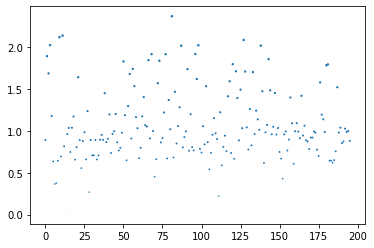

In [29]:
import matplotlib.pylab as plt
import numpy as np

times_myrs=np.array(list(range(0, 196)))
average=df["average"].values
plt.scatter(times_myrs,average,s=average)
plt.show() 

In [30]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

In [22]:
duration_beats = 52.8 #desired duration in beats (actually, onset of last note)

t_data = map_value(times_myrs, 0, max(times_myrs), 0, duration_beats)

#or
#t_data = map_value(ages, min(ages), max(ages), duration_beats, 0)

myrs_per_beat = max(times_myrs)/duration_beats
print('Myrs per beat:', myrs_per_beat)

Myrs per beat: 3.6931818181818183


Duration: 52.8 seconds


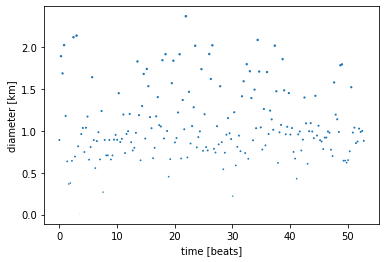

In [23]:
#calculate duration in seconds
bpm = 60  #if bpm = 60, 1 beat = 1 sec 
duration_sec = duration_beats*60/bpm #duration in seconds (actually, onset of last note)
print('Duration:', duration_sec, 'seconds')


plt.scatter(t_data, average, s=average)
plt.xlabel('time [beats]')
plt.ylabel('diameter [km]')
plt.show()

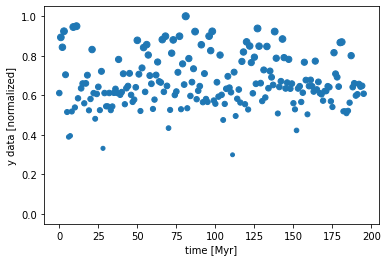

In [24]:
y_data = map_value(average, min(average), max(average), 0, 1) #normalize data, so it runs from 0 to 1 

y_scale = 0.5  #lower than 1 to spread out more evenly

y_data = y_data**y_scale

plt.scatter(times_myrs, y_data, s=50*y_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized]')
plt.show()

In [25]:
from audiolazy import str2midi #import function to convert note names to midi numbers (could also use: midi2str, str2freq, freq2str,freq2midi,midi2freq) https://pypi.org/project/audiolazy/

note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')

Resolution: 23 notes


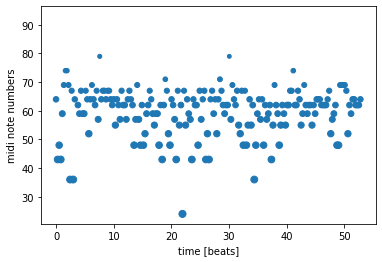

In [26]:
n_impacts = len(df)

midi_data = []
for i in range(n_impacts):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) #notice choice of polarity: bigger craters are mapped to lower notes
                                                        #we round the result because it's a list index which must be an integer
    midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

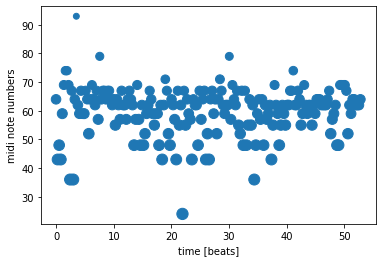

In [27]:
vel_min,vel_max = 35,127   #minimum and maximum note velocity

vel_data = []
for i in range(n_impacts):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max)) #bigger craters will be louder
                                                                #we round here because note velocites are integers
    vel_data.append(note_velocity)
    
plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [28]:
from midiutil import MIDIFile #import library to make midi file, https://midiutil.readthedocs.io/en/1.2.1/
filename = 'Global Warming_2'   
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

#add midi notes
for i in range(n_impacts):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=vel_data[i])

#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f) 

After that, you can add the resulting midi file to any music making application (like GarageBand) and create your music.